In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_excel('linear_regression.xlsx')
df

,date,call,cargo
0,11/15/2023,7084.0,131117
1,11/14/2023,6129.0,122971
2,11/13/2023,5167.0,96725
3,2023-11-11 00:00:00,3361.0,70015
4,2023-10-11 00:00:00,3814.0,76309
...,...,...,...
258,2023-06-01 00:00:00,2923.0,73166
259,2023-05-01 00:00:00,3329.0,81718
260,2023-04-01 00:00:00,3650.0,91396
261,2023-03-01 00:00:00,3594.0,88886


In [3]:
data = df[::-1]
data

,date,call,cargo
262,2023-02-01 00:00:00,2641.0,32262
261,2023-03-01 00:00:00,3594.0,88886
260,2023-04-01 00:00:00,3650.0,91396
259,2023-05-01 00:00:00,3329.0,81718
258,2023-06-01 00:00:00,2923.0,73166
...,...,...,...
4,2023-10-11 00:00:00,3814.0,76309
3,2023-11-11 00:00:00,3361.0,70015
2,11/13/2023,5167.0,96725
1,11/14/2023,6129.0,122971


In [4]:
call = np.array(data.iloc[:,1])
cargo = np.array(data.iloc[:,2])

In [5]:
lm1 = sm.OLS.from_formula('call ~ cargo', data)
result1 = lm1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   call   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     156.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           2.25e-28
Time:                        19:23:19   Log-Likelihood:                -2293.2
No. Observations:                 263   AIC:                             4590.
Df Residuals:                     261   BIC:                             4598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1461.4576    450.662     -3.243      0.001   -2348.853    -574.062
cargo          0.0718      0.006     12.489      0.000       0.060       0.083
==============================================================================
Omnibus:                      188.160   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1829.961
Skew:                           2.874   Prob(JB):                         0.00
Kurtosis:                      14.573   Cond. No.                     3.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
train = data[:round(len(data)*0.8)]
test = data[round(len(data)*0.8):]

In [7]:
lm_train = sm.OLS.from_formula('call ~ cargo', train)
result_train = lm_train.fit()
result_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   call   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     108.3
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.08e-20
Time:                        19:23:19   Log-Likelihood:                -1847.0
No. Observations:                 210   AIC:                             3698.
Df Residuals:                     208   BIC:                             3705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1809.8457    556.355     -3.253      0.001   -2906.663    -713.028
cargo          0.0763      0.007     10.408      0.000       0.062       0.091
==============================================================================
Omnibus:                      146.840   Durbin-Watson:                   0.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1126.071
Skew:                           2.762   Prob(JB):                    3.00e-245
Kurtosis:                      12.909   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
residuals1 = np.array(result_train.resid)

msetrain = np.mean(np.square(residuals1))
rmsetrain = np.sqrt(msetrain)
maetrain = np.mean(np.abs(residuals1))
mapetrain = np.mean(np.abs(residuals1)/np.array(train.iloc[:,1]))

print('MSE Train = ' , msetrain )
print('RMSE Train = ', rmsetrain )
print('MAE Train = ', maetrain )
print('MAPE Train = ', mapetrain )

MSE Train =  2552239.0600726944
RMSE Train =  1597.5728653406375
MAE Train =  977.0132031574936
MAPE Train =  0.2310016856764231


In [9]:
result_train.predict(test)

52    6367.892380
51    7347.732156
50    7469.535233
49    5447.848229
48    3764.723439
47    3066.090890
46    2840.636981
45    3806.671900
44    3992.236636
43    3504.871791
42    3459.109834
41    3251.884437
40    3618.513985
39    4693.691172
38    4245.071451
37    4675.310119
36    4944.924318
35    5584.218861
34    4483.567518
33    3976.830111
32    4857.518979
31    5212.326688
30    5410.933583
29    5216.140185
28    4939.509153
27    4256.664480
26    6042.601134
25    5166.183381
24    5370.739331
23    5116.074038
22    5597.261019
21    4581.193027
20    6414.417037
19    5737.292609
18    4876.586461
17    4611.319649
16    4060.879572
15    3888.585803
14    4693.691172
13    5593.828872
12    4207.851725
11    3349.357406
10    2975.863564
9     3250.664118
8     3678.919769
7     4310.511050
6     4909.992690
5     3942.051023
4     4010.236340
3     3530.193407
2     5567.363207
1     7569.143760
0     8190.438600
dtype: float64

In [10]:
resids_test = test.iloc[:,1] - result_train.predict(test)

msetest = np.mean(np.square(resids_test))
rmsetest = np.sqrt(msetest)
maetest = np.mean(np.abs(resids_test))
mapetest = np.mean(np.abs(resids_test)/np.array(test.iloc[:,1]))

print('MSE Test = ' , msetest)
print('RMSE Test = ', rmsetest)
print('MAE Test = ', maetest)
print('MAPE Test = ', mapetest)

MSE Test =  797461.2218158725
RMSE Test =  893.0068430957696
MAE Test =  683.1341386724417
MAPE Test =  0.13743869939943115


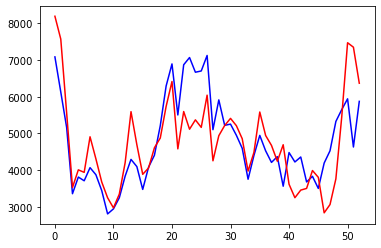

In [11]:
plt.plot(test.iloc[:,1], color = 'b')
plt.plot(result_train.predict(test), color = 'r')

In [12]:
predicted_call = 0.0718 * cargo - 1461.4576

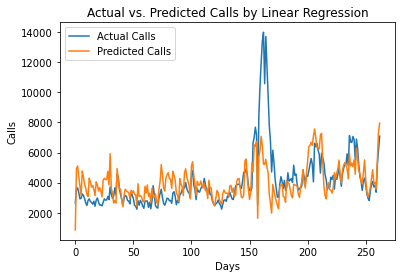

In [13]:
# Compare the plots of actual calls and predicted calls by linear regression method.

plt.plot(call, label = 'Actual Calls')
plt.plot(predicted_call, label = 'Predicted Calls')
plt.legend(loc = 'upper left')

plt.xlabel('Days') 
plt.ylabel('Calls') 
plt.title('Actual vs. Predicted Calls by Linear Regression')

plt.show()

In [14]:
calls_train = predicted_call[:round(len(predicted_call)*0.8)]
calls_test = predicted_call[round(len(predicted_call)*0.8):]

In [15]:
# ARIMA Train Data

arima_mod_train = sm.tsa.arima.ARIMA(calls_train, order=(1, 0, 0))

res_arima_train = arima_mod_train.fit()
print(res_arima_train.summary())

arima_train_pred = res_arima_train.predict()

mse_arima_train = np.mean(np.square(res_arima_train.resid))
rmse_arima_train = np.sqrt(mse_arima_train)
mae_arima_train = np.mean(np.abs(res_arima_train.resid))
mape_arima_train = np.mean(np.abs(res_arima_train.resid) / calls_train)

print('MSE ARIMA TRAIN = ', mse_arima_train)
print('RMSE ARIMA TRAIN = ', rmse_arima_train)
print('MAE ARIMA TRAIN = ', mae_arima_train)
print('MAPE ARIMA TRAIN = ', mape_arima_train)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  210
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1706.480
Date:                Fri, 19 Jan 2024   AIC                           3418.961
Time:                        19:23:22   BIC                           3429.002
Sample:                             0   HQIC                          3423.020
                                - 210                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3880.7639    158.074     24.550      0.000    3570.945    4190.582
ar.L1          0.6759      0.038     17.932      0.000       0.602       0.750
sigma2      6.461e+05   4.31e+04     14.992      0.0

In [16]:
# ARIMA Test Data

arima_mod_test = sm.tsa.arima.ARIMA(calls_test, order=(1, 0, 0))

res_arima_test = arima_mod_test.filter(res_arima_train.params)
print(res_arima_test.summary())

arima_test_pred = res_arima_test.predict()

mse_arima_test = np.mean(np.square(res_arima_test.resid))
rmse_arima_test = np.sqrt(mse_arima_test)
mae_arima_test = np.mean(np.abs(res_arima_test.resid))
mape_arima_test = np.mean(np.abs(res_arima_test.resid) / calls_test)

print('MSE ARIMA TEST = ', mse_arima_test)
print('RMSE ARIMA TEST = ', rmse_arima_test)
print('MAE ARIMA TEST = ', mae_arima_test)
print('MAPE ARIMA TEST = ', mape_arima_test)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -434.397
Date:                Fri, 19 Jan 2024   AIC                            874.795
Time:                        19:23:22   BIC                            880.706
Sample:                             0   HQIC                           877.068
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3880.7639    477.750      8.123      0.000    2944.391    4817.137
ar.L1          0.6759      0.090      7.510      0.000       0.500       0.852
sigma2      6.461e+05   1.45e+05      4.464      0.0

In [17]:
# SARIMA Train Data

sarima_mod_train = sm.tsa.statespace.SARIMAX(calls_train, trend='c', 
                                             order=(1,0,0),
                                             seasonal_order=(1,0,0,6))

res_sarima_train = sarima_mod_train.fit()
print(res_sarima_train.summary())

x_train_pred = res_sarima_train.get_prediction()

mse_x_train = np.mean(np.square(res_sarima_train.resid))
rmse_x_train = np.sqrt(mse_x_train)
mae_x_train = np.mean(np.abs(res_sarima_train.resid))
mape_x_train = np.mean(np.abs(res_sarima_train.resid) / (calls_train))

print('MSE SARIMA TRAIN = ', mse_x_train)
print('RMSE SARIMA TRAIN = ', rmse_x_train)
print('MAE SARIMA TRAIN = ', mae_x_train)
print('MAPE SARIMA TRAIN = ', mape_x_train)

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  210
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 6)   Log Likelihood               -1694.030
Date:                           Fri, 19 Jan 2024   AIC                           3396.060
Time:                                   19:23:22   BIC                           3409.448
Sample:                                        0   HQIC                          3401.472
                                           - 210                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1331.6740    137.821      9.662      0.000    1061.550    1601.798
ar.L1          0.5201      0.031     16.953

In [18]:
# SARIMA Test Data

sarima_mod_test = sm.tsa.statespace.SARIMAX(calls_test, trend='c', 
                                            order=(1,0,0),
                                            seasonal_order=(1,0,0,6))

res_sarima_test = sarima_mod_test.filter(res_sarima_train.params)
print(res_sarima_test.summary())

x_test_pred = res_sarima_test.get_prediction()

mse_x_test = np.mean(np.square(res_sarima_test.resid))
rmse_x_test = np.sqrt(mse_x_test)
mae_x_test = np.mean(np.abs(res_sarima_test.resid))
mape_x_test = np.mean(np.abs(res_sarima_test.resid) / (calls_test))

print('MSE SARIMA TEST = ', mse_x_test)
print('RMSE SARIMA TEST = ', rmse_x_test)
print('MAE SARIMA TEST = ', mae_x_test)
print('MAPE SARIMA TEST = ', mape_x_test)

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   53
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 6)   Log Likelihood                -435.224
Date:                           Fri, 19 Jan 2024   AIC                            878.448
Time:                                   19:23:22   BIC                            886.329
Sample:                                        0   HQIC                           881.479
                                            - 53                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1331.6740    470.774      2.829      0.005     408.974    2254.374
ar.L1          0.5201      0.082      6.312